In [84]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


from fairlearn.datasets import fetch_adult
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, demographic_parity_ratio, equalized_odds_difference, equalized_odds_ratio
from fairlearn.reductions import ExponentiatedGradient

In [2]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function, generate_init


from agent import Person

from model import VirusModel, VirusModel_baseline




In [3]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':20,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': ap.IntRange(0.25,0.3), # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'hist', # None, 'hist'
    'expi': None
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =5, record = True)
results_baseline = exp.run() 
df_baseline = results_baseline['variables']['Person']

Scheduled runs: 5
      race  gender    wealth    health
2672     0       1  0.003374  0.960746
1684     1       0  0.043185  0.190927
8872     0       1  1.000000  0.354627
8078     1       1  0.280027  0.302191
9132     0       0  0.514845  0.548539
...    ...     ...       ...       ...
4292     0       0  0.278677  0.463548
2040     1       0  0.221997  0.692354
8558     0       1  1.000000  0.083469
3461     0       0  0.407557  0.210276
4956     1       1  0.222672  0.096952

[8000 rows x 4 columns]
0.585


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

Completed: 1, estimated time remaining: 0:00:06      race  gender    wealth    health
4201     0       1  1.000000  0.583333
783      0       1  0.224022  0.667550
8166     0       1  0.003374  0.746460
6834     0       1  0.224022  0.896016
5433     1       0  0.097841  0.038685
...    ...     ...       ...       ...
28       0       0  0.337382  0.088493
1978     1       1  0.042510  0.926464
1041     1       1  0.097166  0.463931
7502     0       1  1.000000  0.185580
6780     0       0  0.099190  0.063876

[8000 rows x 4 columns]
0.589


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

Completed: 2, estimated time remaining: 0:00:04      race  gender    wealth    health
8706     0       0  0.163968  0.162600
8048     1       0  0.163293  0.493769
2131     0       0  0.514845  0.414826
7600     0       0  0.337382  0.636899
1426     0       0  0.005398  0.191593
...    ...     ...       ...       ...
2991     0       1  0.224022  0.960367
4425     0       1  1.000000  0.920114
7201     0       1  0.003374  0.063075
2897     0       1  0.224022  0.502876
8320     0       0  0.043185  0.648424

[8000 rows x 4 columns]
0.576


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

Completed: 3, estimated time remaining: 0:00:02      race  gender    wealth    health
4484     0       0  0.514845  0.571340
3200     1       1  0.222672  0.684209
6418     0       0  0.890013  0.918852
73       0       0  0.163968  0.609564
9210     0       0  0.890013  0.571262
...    ...     ...       ...       ...
4224     0       1  0.338057  0.117476
2577     0       1  0.408232  0.676398
9174     0       1  0.516869  0.956401
3294     0       0  0.163968  0.191062
7623     0       0  0.005398  0.808015

[8000 rows x 4 columns]
0.57


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

Completed: 4, estimated time remaining: 0:00:01      race  gender    wealth    health
2779     0       1  0.516869  0.275099
338      0       0  0.278677  0.112039
197      0       0  0.099190  0.340804
6488     0       0  0.890013  0.062449
620      1       0  0.163293  0.868623
...    ...     ...       ...       ...
1378     0       0  0.890013  0.469988
3766     0       0  0.099190  0.224582
2873     1       0  0.006748  0.674294
6521     0       1  0.516869  0.953572
6353     0       1  0.224022  0.180973

[8000 rows x 4 columns]
0.5765


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:07.214058


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

In [4]:
df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])
# df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

df_baseline = df_baseline[df_baseline.fraud_pred != -1]
# df_baseline[df_baseline['misclassifications'] == 0]
df_baseline.head(100) 

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                        
0         1      1   0.226926  0.37454           0      0     0       0   
                 2   0.232075  0.37454           0      1     0       0   
                 3   0.237461  0.37454           0      1     0       0   
                 4   0.243100  0.37454           0      1     0       0   
                 5   0.249010  0.37454           0      0     0       0   
...                       ...      ...         ...    ...   ...     ...   
          5      16  0.220835  0.37454           0      0     0       0   
                 17  0.225712  0.37454           0      0     0       0   
                 18  0.230807  0.37454           0      1     0       0   
                 19  0.236134  0.37454           0      0     0       0   
                 20  0.241710  0.37454           0      1     0       0   

                     convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                           
0         1      1           0           0         0           0         0   
                 2           0           0         0           0         0   
                 3           0           0         0           0         0   
                 4           0           0         0           0         0   
                 5           0           0         0           0         0   
...                        ...         ...       ...         ...       ...   
          5      16          0           0         0           0         0   
                 17          0           0         0           0         0   
                 18          0           0         0           0         0   
                 19          0           0         0           0         0   
                 20          0           0         0           0         0   

                     misclassifications  
iteration obj_id t                       
0         1      1                    0  
                 2                   -1  
                 3                   -1  
                 4                   -1  
                 5                    0  
...                                 ...  
          5      16                   0  
                 17                   0  
                 18                  -1  
                 19                   0  
                 20                  -1  

[100 rows x 12 columns]

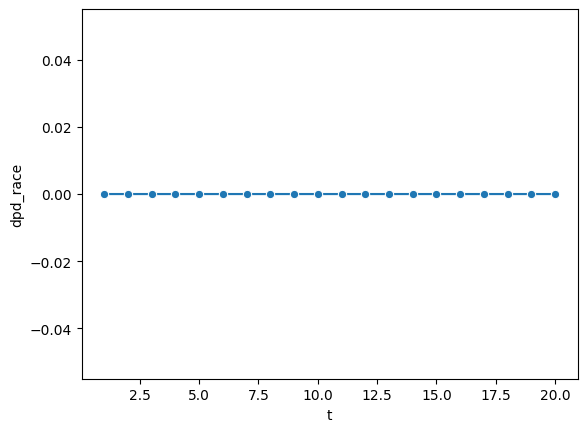

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

sns.lineplot(ax = ax,
                data = df_baseline,
                x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_race'],
                marker = 'o')

# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

In [6]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.8, # accuracy of fraud prdediction
#     'appeal_wealth': ap.IntRange(0.25,0.3), # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'hist', # None, 'hist'
#     'expi': None
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel(parameters)
# exp = ap.Experiment(VirusModel, sample, iterations =2, record = True)
# results_baseline = exp.run() 
# df_baseline = results_baseline['variables']['Person']


In [7]:
df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])
# df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

df_baseline.head() 
df_baseline = df_baseline[df_baseline.fraud_pred != -1]
# df_baseline[df_baseline['misclassifications'] == 0]
df_baseline.head() 

/var/folders/_3/m4zxq5yx589d0965c6l5j1q80000gp/T/ipykernel_85520/1515005289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])


wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                       
0         1      1  0.226926  0.37454           0      0     0       0   
                 2  0.232075  0.37454           0      1     0       0   
                 3  0.237461  0.37454           0      1     0       0   
                 4  0.243100  0.37454           0      1     0       0   
                 5  0.249010  0.37454           0      0     0       0   

                    convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                          
0         1      1          0           0         0           0         0   
                 2          0           0         0           0         0   
                 3          0           0         0           0         0   
                 4          0           0         0           0         0   
                 5          0           0         0           0         0   

                    misclassifications  
iteration obj_id t                      
0         1      1                   0  
                 2                  -1  
                 3                  -1  
                 4                  -1  
                 5                   0

In [8]:
y_true = list(df_baseline['fraud'])
y_pred = list(df_baseline['fraud_pred'])

gender = df_baseline['gender']

len(y_true)

print(demographic_parity_ratio( y_true=y_true, y_pred=y_pred, sensitive_features=gender))
equalized_odds_ratio( y_true=y_true, y_pred=y_pred, sensitive_features=gender)




0.7636921693400976


0.6948883241389284

In [9]:
df_baseline

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                        
0         1      1   0.226926  0.37454           0      0     0       0   
                 2   0.232075  0.37454           0      1     0       0   
                 3   0.237461  0.37454           0      1     0       0   
                 4   0.243100  0.37454           0      1     0       0   
                 5   0.249010  0.37454           0      0     0       0   
...                       ...      ...         ...    ...   ...     ...   
4         100    16  0.489316  0.37454           0      0     0       0   
                 17  0.513259  0.37454           0      1     0       0   
                 18  0.539602  0.37454           0      0     0       0   
                 19  0.568719  0.37454           0      0     0       0   
                 20  0.601063  0.37454           0      1     0       0   

                     convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                           
0         1      1           0           0         0           0         0   
                 2           0           0         0           0         0   
                 3           0           0         0           0         0   
                 4           0           0         0           0         0   
                 5           0           0         0           0         0   
...                        ...         ...       ...         ...       ...   
4         100    16          0           0         0           0         0   
                 17          0           0         0           0         0   
                 18          0           0         0           0         0   
                 19          0           0         0           0         0   
                 20          0           0         0           0         0   

                     misclassifications  
iteration obj_id t                       
0         1      1                    0  
                 2                   -1  
                 3                   -1  
                 4                   -1  
                 5                    0  
...                                 ...  
4         100    16                   0  
                 17                  -1  
                 18                   0  
                 19                   0  
                 20                  -1  

[10000 rows x 12 columns]

In [10]:
from fairlearn.preprocessing import CorrelationRemover

import pandas as pd

from fairlearn.datasets import fetch_diabetes_hospital

X = df_baseline[['race', 'gender', 'wealth', 'health']]

cr = CorrelationRemover(sensitive_feature_ids=['race', 'gender'])

cr.fit(X)
CorrelationRemover(sensitive_feature_ids=['race', 'gender'])

X_transform = cr.transform(X)

X
# X

race  gender    wealth   health
iteration obj_id t                                  
0         1      1      0       0  0.226926  0.37454
                 2      0       0  0.232075  0.37454
                 3      0       0  0.237461  0.37454
                 4      0       0  0.243100  0.37454
                 5      0       0  0.249010  0.37454
...                   ...     ...       ...      ...
4         100    16     0       0  0.489316  0.37454
                 17     0       0  0.513259  0.37454
                 18     0       0  0.539602  0.37454
                 19     0       0  0.568719  0.37454
                 20     0       0  0.601063  0.37454

[10000 rows x 4 columns]

In [11]:
# from fairlearn.preprocessing import CorrelationRemover

# import pandas as pd

# from fairlearn.datasets import fetch_diabetes_hospital

# data = fetch_diabetes_hospital()

# X = data.data[["race", "time_in_hospital", "had_inpatient_days", "medicare"]]

# X = pd.get_dummies(X)

# X = X.drop(["race_Asian",

#                     "race_Caucasian",

#                     "race_Hispanic",

#                     "race_Other",

#                     "race_Unknown",

#                     "had_inpatient_days_False",

#                     "medicare_False"], axis=1)

# cr = CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'])

# cr.fit(X)
# CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'])

# X_transform = cr.transform(X)


             0         1
0     0.163381  0.343858
1     0.168530  0.343858
2     0.173916  0.343858
3     0.179555  0.343858
4     0.185465  0.343858
...        ...       ...
9995  0.425771  0.343858
9996  0.449714  0.343858
9997  0.476057  0.343858
9998  0.505174  0.343858
9999  0.537519  0.343858

[10000 rows x 2 columns]
             0         1
0     0.163381  0.343858
1     0.168530  0.343858
2     0.173916  0.343858
3     0.179555  0.343858
4     0.185465  0.343858
...        ...       ...
9995  0.425771  0.343858
9996  0.449714  0.343858
9997  0.476057  0.343858
9998  0.505174  0.343858
9999  0.537519  0.343858

[10000 rows x 2 columns]


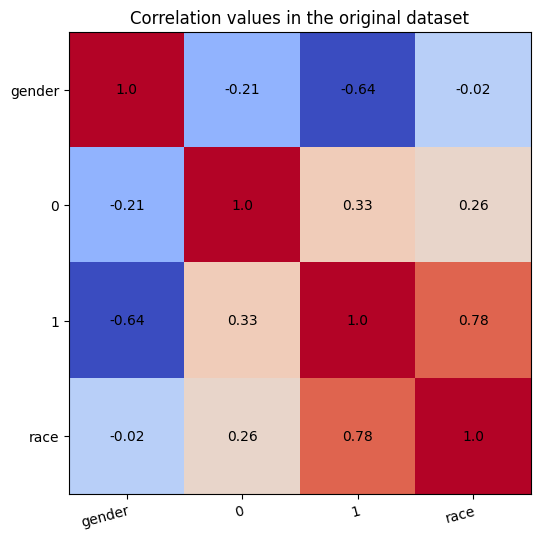

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from fairlearn.datasets import fetch_diabetes_hospital
from fairlearn.preprocessing import CorrelationRemover


def plot_heatmap(df,y, title):
    df["race"] = list(y)
    # df = df.rename(columns={"had_inpatient_days_True": "had_inpatient_days"})
    cols = list(df.columns)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(round(df.corr(), 2), cmap="coolwarm")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(cols)), labels=cols)
    ax.set_yticks(np.arange(len(cols)), labels=cols)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=15, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cols)):
        for j in range(len(cols)):
            ax.text(
                j,
                i,
                round(df.corr().to_numpy()[i, j], 2),
                ha="center",
                va="center",
            )

    ax.set_title(f"{title}")
    plt.show()

X_transform = pd.DataFrame(X_transform)
Xt = copy.deepcopy(X_transform)
print(X_transform)
Xt.insert(0,'gender', list(X['gender']))
print(X_transform)


plot_heatmap(pd.DataFrame(Xt),X['race'], "Correlation values in the original dataset")
# plot_heatmap(X,X['gender'], "Correlation values after CorrelationRemover")
# plot_heatmap(X_cr_alpha, "Correlation values after CorrelationRemover with alpha = 0.5")


In [27]:
X = df_baseline[['race', 'gender', 'wealth', 'health']]
X.shape
pd.DataFrame(y_true).shape

(10000, 1)

In [106]:
from fairlearn.reductions import DemographicParity

from fairlearn.metrics import MetricFrame, selection_rate

import numpy as np

import pandas as pd

dp = DemographicParity(difference_bound=0.01)

X,y = generate_init(train_clf = True, n = 10000, fraud_det = 0)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
y=y.rename(columns = {0:'y'})
X = X.rename(columns = {0: 'race', 1:'gender', 2:'wealth', 3:'health'})

df = pd.concat([X,y], axis =1)

# # Separate majority and minority classes
df_majority = df[df['y'] ==0]
df_minority = df[df['y'] ==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                replace=False,    
                                n_samples=4000)#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                replace=True,     
                                n_samples=4000)# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

# X = df_baseline[['fraud','wealth', 'gender', 'race']]


y = df_up_down_sampled['y']
X = df_up_down_sampled.drop('y', axis = 1)
X = X.rename(columns = {0: 'race', 1:'gender', 2:'wealth', 3:'health'})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

expgrad =  ExponentiatedGradient(GradientBoostingClassifier(), constraints=DemographicParity(),eps=0.1)

expgrad.fit(X_train, pd.DataFrame(y_train), sensitive_features= X_train['race'])






/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:325: RuntimeWarning: invalid value encountered in multiply
  lhs_ub = -np.ones_like(b_ub)*np.inf  # LHS of UB constraints is -inf


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x1699ab8b0>,
                      eps=0.1, estimator=GradientBoostingClassifier(),
                      nu=0.0031213324684588955)

In [107]:
y_pred = (expgrad.predict(X_test))

abs(y_pred - np.array(y_test).flatten()).sum()/len(y_pred)



0.4095

Now just run it through the fairness metrics, not much better than without?? 

-> implement everything in clf_train

In [96]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [108]:
# y_true = list(df_baseline['fraud'])
# y_pred = list(df_baseline['fraud_pred'])

gender = X_test['gender']

print(gender.shape)
print(np.array(y_true).shape)


print(demographic_parity_ratio( y_true=y_test, y_pred=y_pred, sensitive_features=gender))
equalized_odds_ratio( y_true=y_test, y_pred=y_pred, sensitive_features=gender)




(2000,)
(10000,)
0.6642525201146767


0.5786302175191064